## Copyright Note


## Deep Learning Reference 1
**Most of the deep learning and convolution neural network materials' figures, definitions, and examples are courtesy of or adapted from the following book **: **Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems 2nd Edition
by Aurélien Géron  (Author)**[ relative links](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646)
## Deep Learning Reference 2

**Most of the deep learning and convolution neural network materials' figures, definitions, and examples are courtesy of or adapted from the following book **: **Deep Learning with Python by Francois Chollet (2018)**[relative link](https://www.amazon.com/Deep-Learning-Python-Francois-Chollet/dp/1617294438/ref=sr_1_3?ie=UTF8&qid=1532546159&sr=8-3&keywords=deep+learning+with+python)

**Other examples are adapted from wiki and internet resources**

# Keras, TensorFlow, Theano, and CNTK

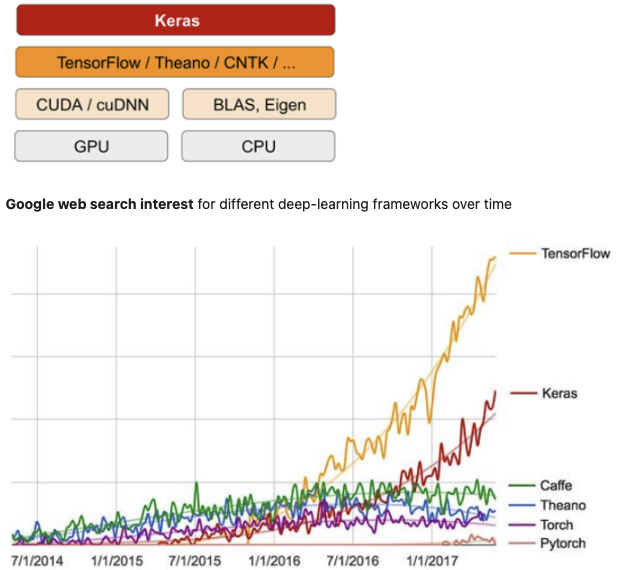

# Fully-connected Neural Network

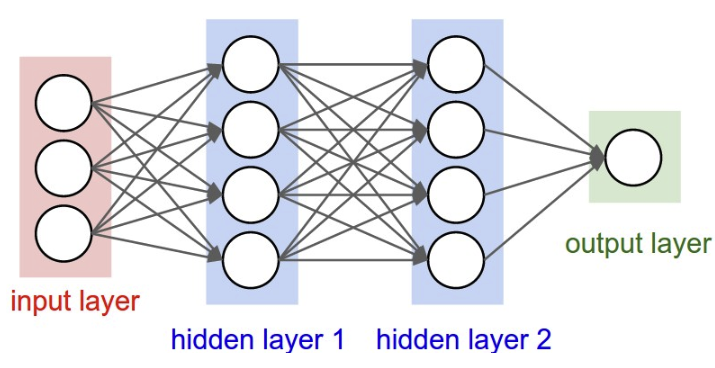

## Multi-Layer Perceptron

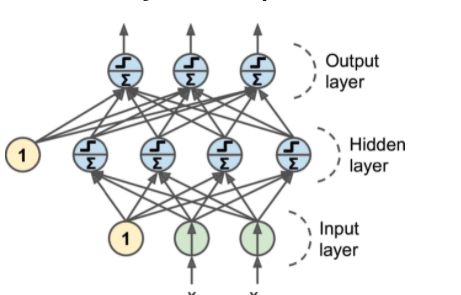


<b> MLP is the signal flows only in one direction (from the inputs to the outputs), so this architecture is an example of a feedforward neural network (FNN).</b>

1. A multilayer perceptron (MLP) is a class of feedforward artificial neural network. 
2. A MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. 
3. MLP utilizes a supervised learning technique called backpropagation for training. 
4. MLP multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.


When an ANN ( Artificial Neural Network )contains a deep stack of hidden layers, it is called a deep neural network (DNN). The field of Deep Learning studies DNNs, and more generally models containing deep stacks of computations. However, many people talk about Deep Learning whenever neural networks are involved (even shallow ones).


### MLP Algorithm

#### For each training instance, do: 
1. Make prediction using backpropagation algorithm (forward pass)
2. Measure the error, then go through each layer in reverse to measure the error contribution from each connection (reverse pass).
    - The algorithm measures the network’s output error (i.e., it uses a loss function that compares the desired output and the actual output of the network, and returns some measure of the error).
    - The algorithm computes how much each output connection contributed to the error. This is done analytically by simply applying the chain rule (See the deep learning book), which makes this step fast and precise.
3. Tweak  slightly the connection weights to reduce the error (Gradient Descent step).

#### Important tips:
1. Handle one mini-batch at a time in the training dataset (Each pass is an epoch).
2. It is important to initialize all the hidden layers’ connection weights randomly, or else training will fail.
    -  Equal weights (Same effects on neorons of layers) vs. Non-equal weights (break the symme! try and allow backpropagation to train a diverse team of neurons).
3. Instead of step function, [multiple activation functions could be fine-tuned](https://mlfromscratch.com/activation-functions-explained/#/) (See the below figure):

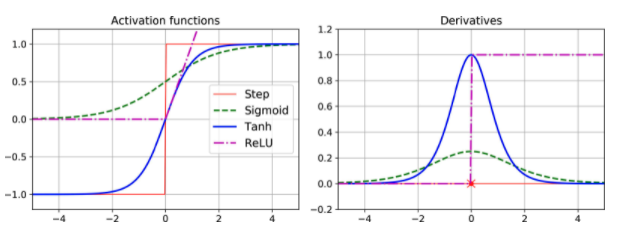

### [How to select the most adequate activation function](https://blog.knoldus.com/activation-function-in-neural-network/#:~:text=Limitations%20a%20linear%20activation%20function%20has%20two%20major,and%20has%20no%20relation%20to%20the%20input%20x.)

You need to match your activation function for your output layer based on the type of prediction problem that you are solving—specifically, the type of predicted variable.     

Here’s what you should keep in mind.       

As a rule of thumb, you can begin with using the ReLU activation function and then move over to other activation functions if ReLU doesn’t provide optimum results.        

And here are a few other guidelines to help you out.    

1. ReLU activation function should only be used in the hidden layers.
2. Sigmoid/Logistic and Tanh functions should not be used in hidden layers as they make the model more susceptible to problems during training (due to vanishing gradients).
3. Swish function is used in neural networks having a depth greater than 40 layers.

### [Gradient Descent Problems and Solutions in Neural Networks](https://medium.com/analytics-vidhya/gradient-descent-problems-and-solutions-in-deep-learning-8002bbac09d5)

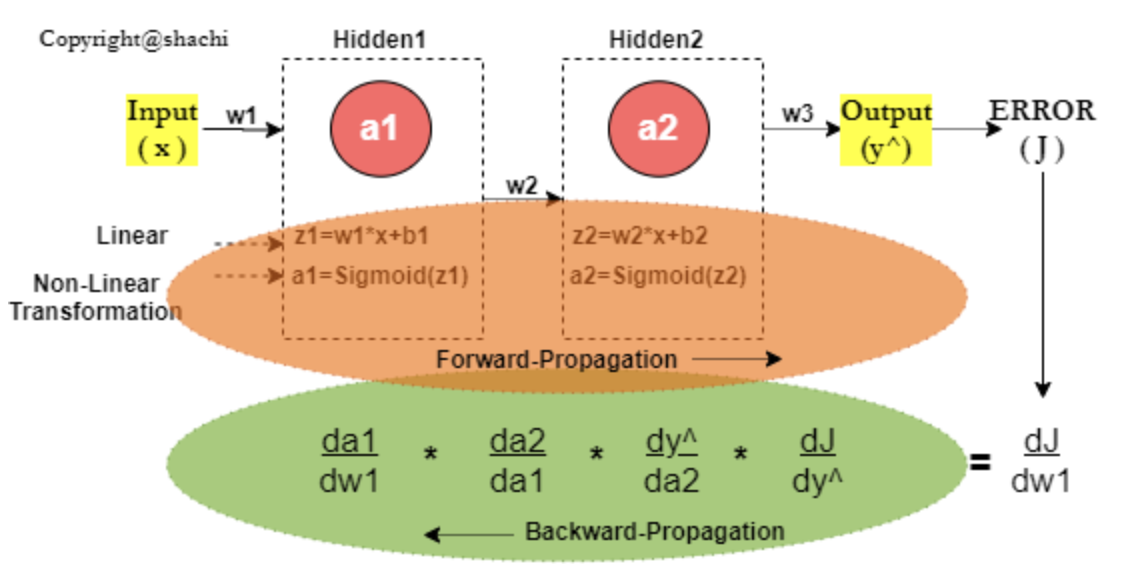

#### Gradient Problems
1. Vanishing Gradient
Vanishing gradient is a scenario in the learning process of neural networks where model doesn’t learn at all. It is due to when gradient becomes too small, almost vanishes leads to weights got stuck and never reach the optimal value for minimal loss(global minima). Thus network not able to learn and converge. And especially during chain rule differentiation, back-propagating from last to initial layer may lead to no updates of weights at all.    

2. Exploding Gradient
Exactly opposite to vanishing gradient when model keeps on learning, weights keep on updating large but model never gets converged.Computes gradient (loss) with respect to weights which becomes extremely large in the earlier layers in such a way that it explodes. Keeps on oscillating, taking large step size and diverges from the convergence point while moving away from it.   

3.  Saddle Point (MiniMax Point)
Saddle point on a surface of loss function is that diplomatic point where seeing from one dimension, that critical point seems minimum while from other dimension it seems as a maximum point.

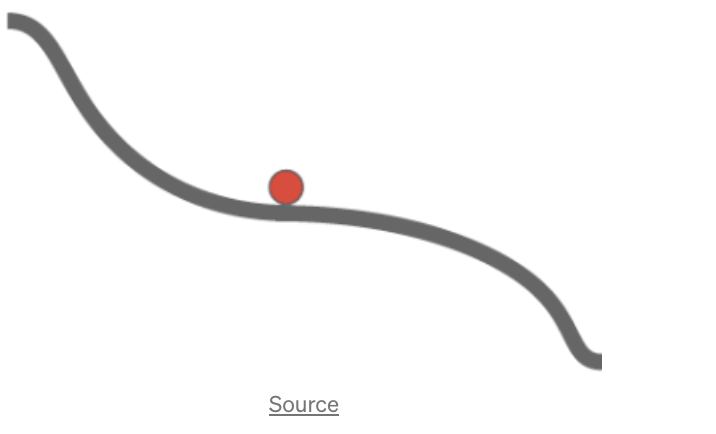


Saddle point is a fuss around learning since it causes a confusion. When model learning stops at this critical thinking as “minimum” is reached hence slope=0 which is actually a maximum cost value from other dimension. This results in an non-optimal point.
Saddle point comes into view when gradient descent runs in multi-dimension.

#### Here’s scenarios of critical points.

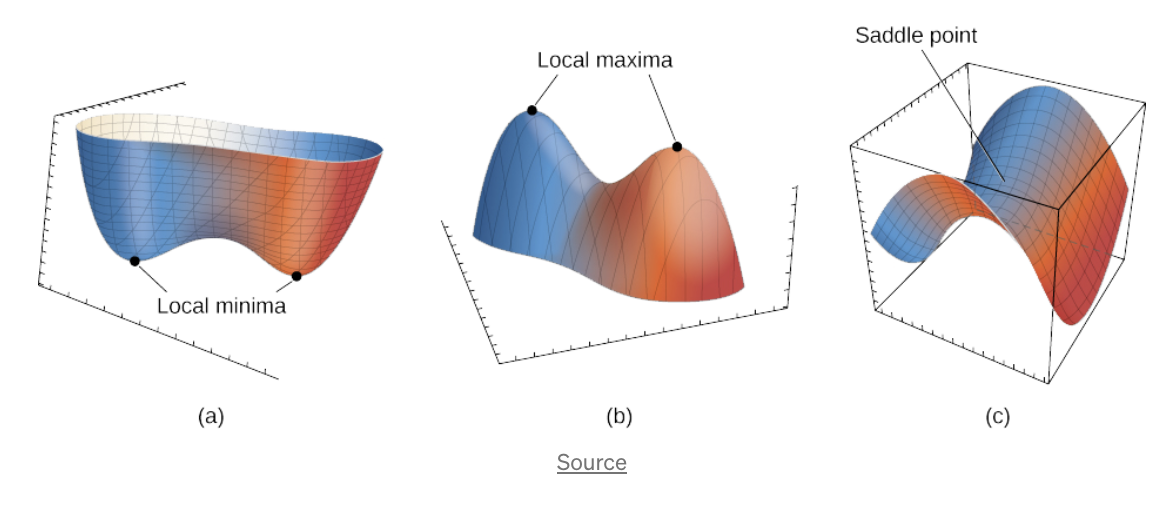


### Typical Regression MLP Architecture:

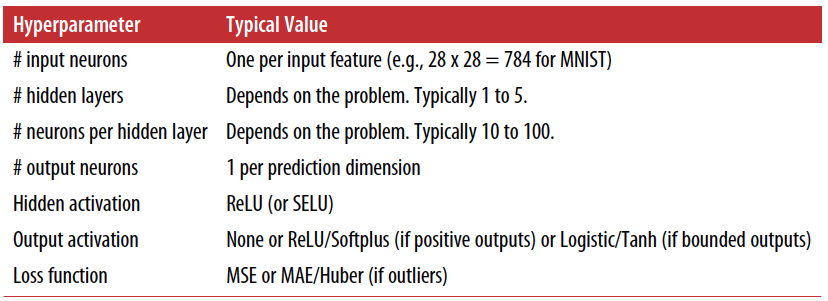

### Typical Classification MLP Architecture:

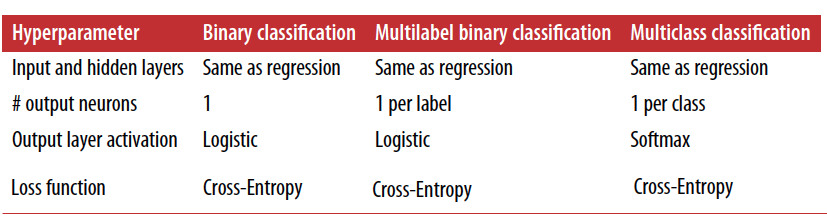

## Using Sequential API (Dense layers and Keras)

The below image form the above reference 2 book

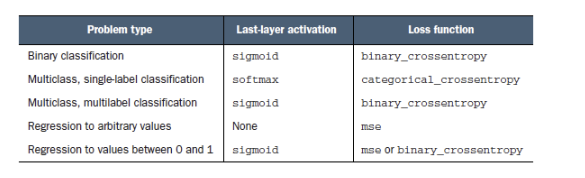

In [ ]:
#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
print(tf.__version__)
info="""
0 = all messages are logged (default behavior)
1 = INFO messages are not printed
2 = INFO and WARNING messages are not printed
3 = INFO, WARNING, and ERROR messages are not printed
"""

from tensorflow import keras

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

In [ ]:
print(tf.__version__)
print(keras.__version__)

### Multi-class problem

#### [Fashion-Mnist](https://github.com/zalandoresearch/fashion-mnist)

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

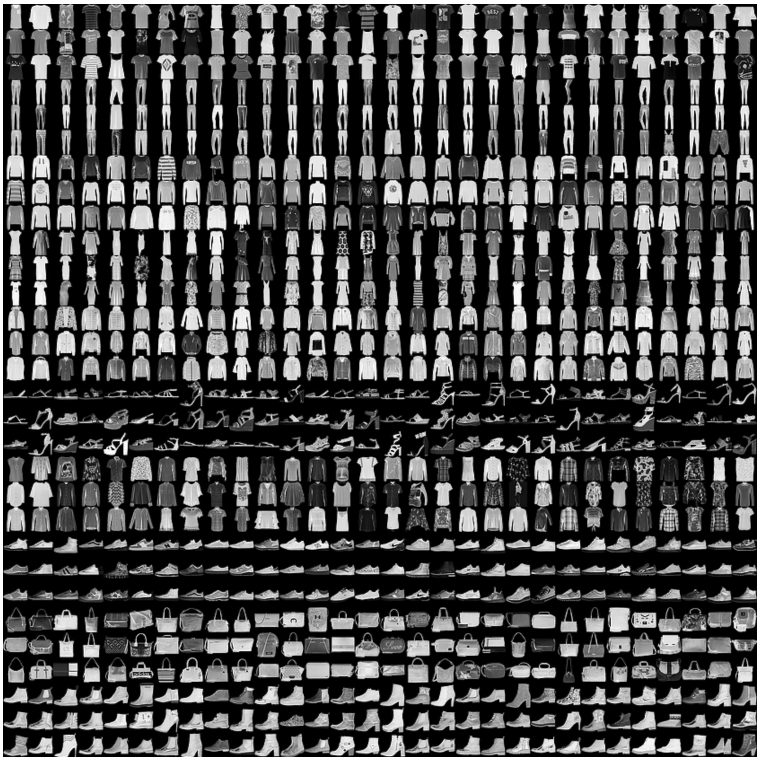

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) =fashion_mnist.load_data()

In [ ]:
print(X_train_full.shape)
print(X_train_full.dtype)

In [ ]:
#Scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [ ]:
print(X_train.shape,X_test.shape,X_valid.shape)

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
#How to calculate the parameters from the model summary
model.summary()

In [ ]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
hidden1 = model.layers[1]
hidden1.name

In [ ]:
model.get_layer(hidden1.name) is hidden1

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
print(weights)
print(biases)

In [ ]:
print(weights.shape)
print(biases.shape)

In [ ]:
print(X_train.shape,X_test.shape,X_valid.shape)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
#Number of batches= 32 //default so 55000/32 = 
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

In [ ]:
history.params

In [ ]:
history.history.keys()

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
help(model.evaluate)

In [ ]:
model.evaluate(X_test, y_test)  #10,000/32=313

### Regression MLP
<b> Let's load, split and scale [the California housing dataset](https://developers.google.com/machine-learning/crash-course/california-housing-data-description)</b>

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
X_train.shape 

In [ ]:
X_train.shape[1:]

In [ ]:
X_test[:3]

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

In [ ]:
mse_test = model.evaluate(X_test, y_test)

In [ ]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()